## Supply Chain Optimization

This project aims to develop a comprehensive data engineering solution for supply chain management. It is divided into four main parts:

**ETL Pipeline:** To extract, clean, and load data into the system.

**Data Modeling:** To structure the data in a data warehouse for efficient storage and retrieval.

**Data Analysis and Visualization:** To provide actionable insights for better decision-making.

**Machine Learning Model:** To forecast revenue using predictive algorithms.

#### ETL Pipeline
The first step in a data engineering workflow is building an ETL (Extract, Transform, Load) pipeline. This is essential because raw data is often scattered across different sources and contains various inconsistencies. Here's what each phase entails:


**1.Extract:** Collect data from different sources, which may vary in format or location.

**2.Transform:** Clean and prepare the data by handling issues like missing values, human errors, and inconsistencies.

**3.Load:** Once cleaned, load the data into a storage system or database for further analysis and use.
For this project, we will be using the Pandas library, a powerful Python tool for data manipulation and analysis.

Since our dataset is stored locally, we can proceed directly to loading the data and exploring its contents.

In [27]:
import pandas as pd
import sqlite3

orders_shipments = pd.read_csv('E:/data/database/DWH/data/orders_and_shipments.csv')
orders_shipments.sample(10)

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
3928,13975,34973,201508,2015,8,2,19:50,1,Fan Shop,Water Sports,...,United Kingdom,USA,2015,8,4,First Class,1,200,0.02,100
24766,11038,27637,201506,2015,6,11,02:45,1,Golf,Shop By Sport,...,France,Puerto Rico,2015,6,15,Second Class,2,40,0.06,97
9168,21848,54632,201511,2015,11,15,21:58,1,Fan Shop,Camping & Hiking,...,Australia,Puerto Rico,2015,11,19,Standard Class,4,300,0.04,150
22285,45993,114945,201611,2016,11,2,09:02,5,Fan Shop,Indoor/Outdoor Games,...,Canada,USA,2016,11,6,Standard Class,4,250,0.01,125
8270,37333,93206,201606,2016,6,28,23:03,1,Fan Shop,Fishing,...,USA,USA,2016,7,2,Second Class,2,400,0.15,200
27940,19583,48961,201510,2015,10,13,20:26,5,Apparel,Cleats,...,Netherlands,Puerto Rico,2015,10,17,Second Class,2,300,0.06,147
10292,63961,159901,201707,2017,7,22,16:02,5,Footwear,Cardio Equipment,...,Germany,Puerto Rico,2017,7,24,Standard Class,4,500,0.03,245
10115,63848,159603,201707,2017,7,21,00:26,4,Footwear,Boxing & MMA,...,United Kingdom,Puerto Rico,2017,7,23,Standard Class,4,360,0.16,145
6913,49825,124563,201612,2016,12,28,07:33,1,Apparel,Men's Footwear,...,Cote d�Ivoire,USA,2015,3,20,Standard Class,4,130,0.18,65
17308,13901,34802,201705,2017,5,21,11:34,1,Fan Shop,Fishing,...,Finland,USA,2017,6,2,Second Class,2,400,0.04,200


### Data Exploration and Identifying Issues
Now that we've loaded a sample of the data, we can already identify some initial issues. For example:

- **Order YearMonth:** The column name and the values within it are inconsistent or improperly formatted.
- **Customer Country:** There are inconsistencies in the values, which need to be addressed.

However, to proceed with the data cleaning process, we need a deeper understanding of the dataset. Simply looking at a sample is not enough. We need to explore further by:

- **Inspecting the Shape:** To know the number of rows and columns.
- **Listing Column Names:** To ensure consistency and identify potential naming issues.
- **Checking Data Types:** To verify if columns have appropriate data types (e.g., dates, integers, etc.).
- **Checking for Missing Values:** To identify columns that have incomplete data.



##### Step 1 : Inspecting the Shape

In [28]:
orders_shipments.shape

(30871, 24)

The dataset contain 30871 row and 24 columns 

##### Step 2 : Explore name of columns

In [29]:
orders_shipments.columns

Index(['Order ID ', ' Order Item ID ', ' Order YearMonth ', ' Order Year ',
       ' Order Month ', ' Order Day ', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name',
       ' Customer ID ', 'Customer Market', 'Customer Region',
       'Customer Country', 'Warehouse Country', 'Shipment Year',
       'Shipment Month', 'Shipment Day', 'Shipment Mode',
       ' Shipment Days - Scheduled ', ' Gross Sales ', ' Discount % ',
       ' Profit '],
      dtype='object')

Upon inspecting the dataset, we’ve identified additional issues, such as spaces before some column names. These inconsistencies can cause problems when referencing columns in our transformations, so it’s important to clean them early in the process.



In [30]:
orders_shipments.columns = orders_shipments.columns.str.strip()
orders_shipments.columns

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')

#### Step 3: Checking Data Types and Missing Values

In [31]:
orders_shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Order ID                   30871 non-null  int64 
 1   Order Item ID              30871 non-null  int64 
 2   Order YearMonth            30871 non-null  int64 
 3   Order Year                 30871 non-null  int64 
 4   Order Month                30871 non-null  int64 
 5   Order Day                  30871 non-null  int64 
 6   Order Time                 30871 non-null  object
 7   Order Quantity             30871 non-null  int64 
 8   Product Department         30871 non-null  object
 9   Product Category           30871 non-null  object
 10  Product Name               30871 non-null  object
 11  Customer ID                30871 non-null  int64 
 12  Customer Market            30871 non-null  object
 13  Customer Region            30871 non-null  object
 14  Custom

Although our data doesn't have any missing values, we can already spot an issue with the `Discount %` column: its data type is `object`, while it should be `float`. This type mismatch is an example of messy data, where the structure of the data doesn't align with our expectations.

Before solving the issues in our dataset, let's define two key terms:

1. **Dirty Data**: which has issues with its content is often called low-quality data and can include things like inaccurate data, corrupted data, and duplicate data.

2. **Messy Data**: Refers to data that has structural problems, such as incorrect data types, misaligned columns, or inconsistent formats.

As observed, the `Discount %` column's data type should be `float`, but it is currently object. This issue of incorrect data type is a prime example of messy data. To resolve it, let's take a closer look at the column and investigate the underlying problem.

In [32]:
orders_shipments['Discount %']

0         0.25
1         0.09
2         0.06
3         0.15
4         0.13
         ...  
30866     0.06
30867     0.12
30868     0.09
30869     0.02
30870      -  
Name: Discount %, Length: 30871, dtype: object

The issue with the Discount % column arises because some of its values are represented by dashes (-), which signifies no discount. Since these dashes are treated as text, they prevent the column from being recognized as a numerical data type.

To resolve this, we will:

1. Replace the dashes `-` with 0 to indicate no discount.
2. Convert the data type of the `Discount %` column from object to float, allowing us to perform numerical operations on it.


In [33]:
#Remove any spaces before or after values of Discount % column
orders_shipments['Discount %'] = orders_shipments['Discount %'].str.strip()

#Replace dash with 0 and convert data type of the column 
orders_shipments['Discount %'] = orders_shipments['Discount %'].replace('-', '0').astype(float)
orders_shipments['Discount %']

0        0.25
1        0.09
2        0.06
3        0.15
4        0.13
         ... 
30866    0.06
30867    0.12
30868    0.09
30869    0.02
30870    0.00
Name: Discount %, Length: 30871, dtype: float64

Above we see an isuess in values of Customer country and this is an example on Dirty data so we need to see if there are other issues like this or not

In [34]:
orders_shipments['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican�Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d�Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Per�', 'Algeria�', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulg

There are 5 issues in our data so we are going to clean them

In [35]:
orders_shipments['Customer Country'] = orders_shipments['Customer Country'].replace({'Dominican�Republic' : 'Dominican Republic',
                                                                                      'Cote d�Ivoire' : "Cote d'Ivoire", 'Per�' : 'Peru',
                                                                                        'Algeria�' : 'Algeria'  , 'Israel�' :'Palestine' ,
                                                                                          'Ben�n' : 'Benin' })
orders_shipments['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', "Cote d'Ivoire", 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Peru', 'Algeria', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulga

We will remove the unnecessary columns

In [36]:
orders_shipments = orders_shipments.drop(columns = ['Order Item ID' ,'Order YearMonth'] , axis = 1)
orders_shipments.columns

Index(['Order ID', 'Order Year', 'Order Month', 'Order Day', 'Order Time',
       'Order Quantity', 'Product Department', 'Product Category',
       'Product Name', 'Customer ID', 'Customer Market', 'Customer Region',
       'Customer Country', 'Warehouse Country', 'Shipment Year',
       'Shipment Month', 'Shipment Day', 'Shipment Mode',
       'Shipment Days - Scheduled', 'Gross Sales', 'Discount %', 'Profit'],
      dtype='object')

In [37]:
orders_shipments

,Order ID,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,2015,2,21,14:07,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,2015,3,2,07:37,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,2015,4,18,22:47,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,2017,12,5,04:59,1,Fan Shop,Toys,Toys,16799,...,Australia,Puerto Rico,2017,12,11,Standard Class,4,12,0.06,6
30867,7908,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,Paraguay,Puerto Rico,2015,4,30,Standard Class,4,30,0.12,68
30868,29326,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,India,Puerto Rico,2016,3,6,Second Class,2,30,0.09,68
30869,63308,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,Germany,Puerto Rico,2017,7,17,Second Class,2,150,0.02,60


Now we will create two new columns :

1. Create Shipping time column
2. Create a column to see if there is a delay in shipping or not

**First** we need to combine the three columns related to shipping date like (Year - Month - Day) and put them in a single column and do the same thing in order date and ensure to make the data type of these two columns as datetime

**Second** we will get the difference between Shipment date and Order date

#### Step 1: Create Shipping Time Column
We need to calculate the time difference between when the order was placed and when it was shipped. To do this:

Combine Date Columns: We will merge the three columns related to both the Order date and Shipment date (Year, Month, and Day) into two separate columns: Order date and Shipment date. This will ensure that the date is represented as a single unit.

Convert to Datetime: Once combined, we'll convert both columns into datetime format to make it possible to compute the time difference between them.

Calculate Shipping Time: We will subtract the Order date from the Shipment date to calculate the time it took to ship the order. This will be stored in a new column called Shipping time.


In [38]:
orders_shipments['Shipment date'] = pd.to_datetime(orders_shipments['Shipment Year'].astype(str) + '-' +
                                     orders_shipments['Shipment Month'].astype(str) + '-' +
                                     orders_shipments['Shipment Day'].astype(str))

orders_shipments['Order date'] = pd.to_datetime(orders_shipments['Order Year'].astype(str) + '-' +
                                     orders_shipments['Order Month'].astype(str) + '-' +
                                     orders_shipments['Order Day'].astype(str))

orders_shipments['Shipping Time'] = orders_shipments['Shipment date'] - orders_shipments['Order date']
orders_shipments['Shipping Time'] = orders_shipments['Shipping Time'].dt.days

#### Step 2: Create Delay Status Column
To check whether the order was shipped on time or delayed:

Define Delay Criteria: If the Shipping time is greater than the expected shipping days `Shipment Days - Scheduled`, we will mark the order as "Late."
Create a Delay Shipment Column: We will add a new column, `Delay Shipment`, which will store the value **Late** if the shipping time exceeds the threshold, and **On time** if the order was shipped within the expected time frame.

In [39]:
def calculate_delay(row):
    if row['Shipping Time'] > row['Shipment Days - Scheduled']:
        return 'Late'
    else:
        return 'On time'

orders_shipments['Shipment Status'] = orders_shipments.apply(calculate_delay, axis=1)

#### Data Modeling and Star Schema Design
After cleaning the dataset, we move to the Data Modeling phase of our project. This step is critical because it lays the foundation for organizing, storing, and relating our data, which will later be used for analysis and insights.

What is Data Modeling?
Data Modeling is the process of designing the structure of data, specifying how the data will be organized, stored, and connected with other data. It provides a blueprint for the data to ensure that it is both scalable and easy to analyze.

Why Star Schema?
There are many types of schemas for organizing data, but the Star Schema is particularly well-suited for our project because of its simplicity and efficiency in handling analytical queries. The Star Schema consists of:

A central fact table that stores quantitative data.
Dimension tables that store descriptive data and provide context to the facts.

The ERD diagram for our Data Modeling will be like that

#### Star Schema Structure
In the context of our supply chain project, the dimension tables describe the characteristics of orders, products, customers, shipments, and warehouses, while the fact table stores the numeric data relevant to our analysis.

1. Dimension Tables:
- **DimProduct:** Contains information about the products such as department, category, and name.
- **DimCustomer:** Holds data about the customers, including customer market, region, and country.
- **DimDate:** Stores details about order and shipment dates.
- **DimShipment:** Contains information about Shipment dates , Mode , Delay Status  
- **DimWarehouse:** Contains information about warehouses, such as location.
2. Fact Table:
The fact table store quantitative, numerical data, which are typically measurements that are the main focus of analysis such as:

- **Profit**
- **Gross Sales**
- **Discount**
- **Shipping Time**

These dimensions and facts form a Star Schema, where the fact table is at the center, linked to each dimension table.

#### Creating the Dimension Tables
To create the dimension tables, we will:

1. Extract relevant columns from the dataset.
2. Remove duplicate values (dimension tables should not have duplicates).
3. Assign a primary key to each dimension table. This will allow us to create relationships between the dimension and fact tables.

Example: Creating the Product Dimension Table
We will start by creating the DimProduct table:

1. Extract relevant columns: `Product Department`, `Product Category`, `Product Name`.
2. Remove duplicates to ensure each product is uniquely represented.
3. Add a primary key column to uniquely identify each product.

We'll apply the same process to other dimension tables like **DimCustomer**, **DimDate**, **DimWarehouse** and **DimShipment**.

This step ensures that our data is properly organized and ready for analysis using the star schema model. The relationships between these dimension tables and the central fact table will form the basis of our data warehouse.

In [40]:
DimProduct = orders_shipments[['Product Department', 'Product Category', 'Product Name']].drop_duplicates()
DimProduct['ProductID'] = range(1, len(DimProduct) + 1)
DimProduct = DimProduct[['ProductID' , 'Product Department', 'Product Category', 'Product Name']]

Create Customer dimension 

In [41]:
DimCustomer = orders_shipments[['Customer ID' , 'Customer Market' , 'Customer Region' , 'Customer Country']].drop_duplicates()
sum_duplicated = DimCustomer['Customer ID'].duplicated().sum()
sum_duplicated

2967

Although we removed duplicates, we still notice that there are 2967 duplicates in our data.

Let's inspection this issue. 

In [42]:
DimCustomer[DimCustomer['Customer ID'] == 94]

,Customer ID,Customer Market,Customer Region,Customer Country
62,94,Europe,Northern Europe,United Kingdom
115,94,North America,US Center,USA
469,94,LATAM,South America,Brazil


we see a sample of this issue where different customers share the same Customer ID. This requires us to create a new unique Customer ID for each customer, ensuring that our Customer Dimension table has no duplicates and can be correctly linked to the Fact Table.

In [43]:
DimCustomer = orders_shipments[['Customer ID' , 'Customer Market' , 'Customer Region' , 'Customer Country']].drop_duplicates()

# Create a primary key CustomerID
DimCustomer['CustomerID'] = range(1, len(DimCustomer) + 1)

#reorder the columns
DimCustomer = DimCustomer[['CustomerID', 'Customer ID' , 'Customer Market', 'Customer Region', 'Customer Country']]

Create warehouse dimension

In [44]:
DimWarehouse = orders_shipments[['Warehouse Country']].drop_duplicates()

# Create a primary key WarehouseID
DimWarehouse['WarehouseID'] = range(1, len(DimWarehouse) + 1)

# reorder the columns
DimWarehouse = DimWarehouse[['WarehouseID', 'Warehouse Country']]

Create shipment dimension

In [45]:
# Create DimShipment table
DimShipment = orders_shipments[['Shipment date' , 'Shipment Year', 'Shipment Month', 'Shipment Day'
                                , 'Shipment Mode','Shipment Days - Scheduled' , 'Shipment Status']].drop_duplicates()

# Create a primary key ShipmentID
DimShipment['ShipmentID'] = range(1, len(DimShipment) + 1)

# reorder the columns
DimShipment = DimShipment[['ShipmentID', 'Shipment date' , 'Shipment Year', 'Shipment Month'
                           , 'Shipment Day', 'Shipment Mode','Shipment Days - Scheduled' , 'Shipment Status']]


Create date dimension

In [46]:
# Create DimDate table with Order Year, Month, and Day
DimDate = orders_shipments[['Order date', 'Order Year','Order Month', 'Order Day']].drop_duplicates()

# Create a primary key DateKey
DimDate['DateID'] = range(1, len(DimDate) + 1)

# reorder the columns
DimDate = DimDate[['DateID', 'Order date', 'Order Year','Order Month', 'Order Day']]
DimDate

,DateID,Order date,Order Year,Order Month,Order Day
0,1,2015-02-21,2015,2,21
1,2,2015-03-02,2015,3,2
2,3,2015-04-18,2015,4,18
3,4,2015-06-10,2015,6,10
6,5,2015-10-09,2015,10,9
...,...,...,...,...,...
18871,1092,2017-12-05,2017,12,5
18880,1093,2017-12-06,2017,12,6
18887,1094,2017-12-07,2017,12,7
28623,1095,2017-11-23,2017,11,23


This ERD diagram illustrates the relationships between **the Fact Table** and **the Dimension Tables** in our data model. It follows the `Star Schema` approach, where the central **Fact Table** stores the transactional data, and the surrounding **Dimension Tables** contain descriptive information for context. This design helps to efficiently structure the data for analysis, ensuring quick and scalable queries.

![Screenshot 2024-10-19 233226.jpg](<attachment:Screenshot 2024-10-19 233226.jpg>)
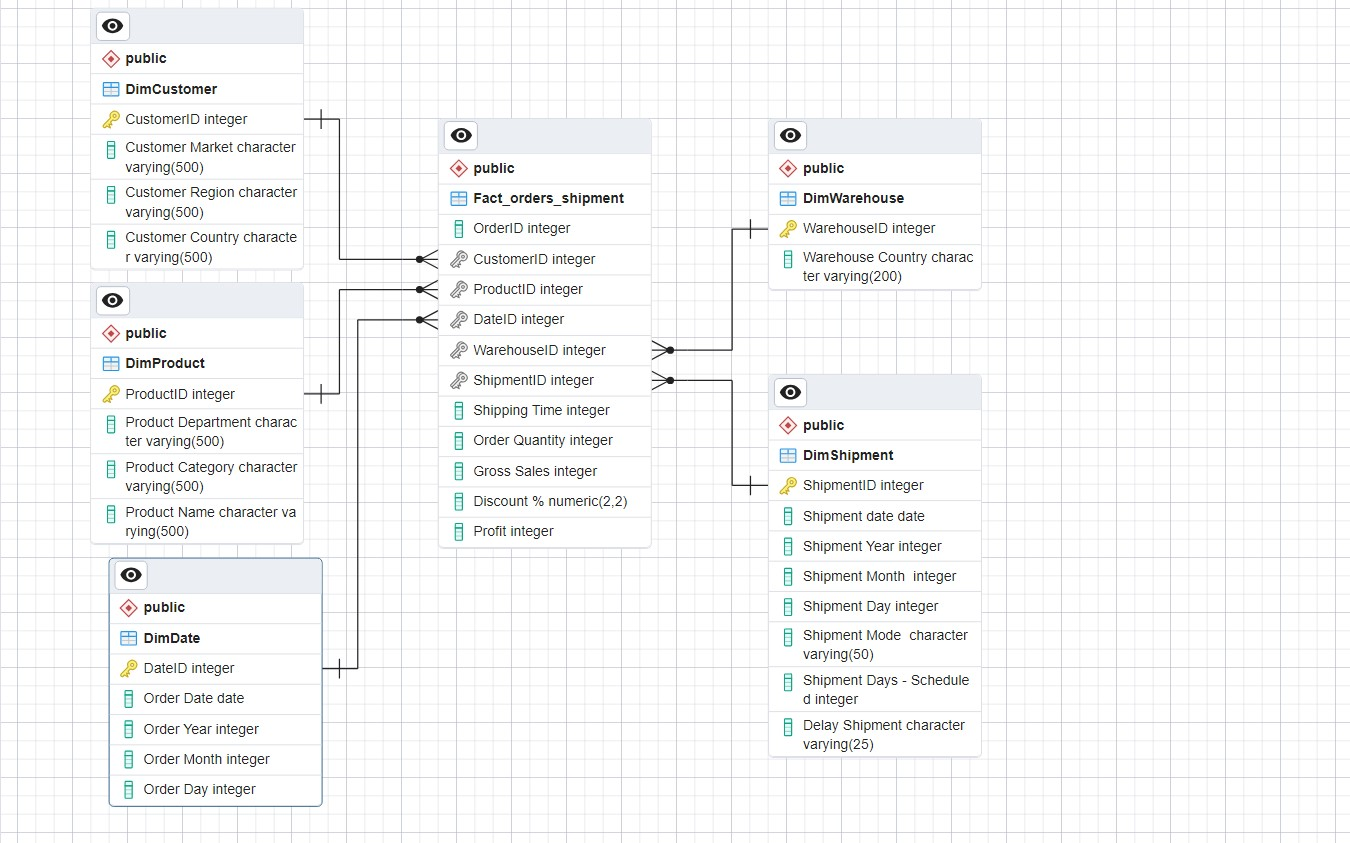

#### Replacing Attributes with Foreign Keys in the Fact Table
Once the dimension tables have been created, the next step is to link them to the fact table. To do this, we need to replace the attributes from the dimension tables with their corresponding `primary keys`. These primary keys will act as `foreign keys` in the fact table, enabling the relationship between the fact table and the dimension tables.

Why Replace Attributes with Foreign Keys?
In a **Star Schema**, **the dimension tables** store descriptive attributes (e.g., `product name`, `customer region`), while **the fact table** stores quantitative data. To create relationships between the fact table and dimension tables, we use foreign keys. By replacing the attributes with foreign keys, we ensure that each row in the fact table is linked to the corresponding row in the dimension tables.

Steps to Replace Attributes:
1. Identify the attributes from the fact table that correspond to the dimension tables (e.g., customer-related fields, product-related fields).
2. Replace these attributes in the fact table with the primary keys from the relevant dimension tables.
These primary keys will now act as foreign keys, linking the fact table to each dimension table.

Example Process:
- `DimProduct`: Replace product-related columns (like Product Name) in the fact table with the ProductID from the DimProduct table.
- `DimCustomer`: Replace customer-related columns (like Customer Country) with the CustomerID from the DimCustomer table.
- `DimDate`: Replace date-related columns (like Order Date) with the DateID from the DimDate table.
- `DimShipment`: Replace shipment-related columns (like Shipment date) with the ShipmentID from the DimShipment table.
- `DimWarehouse`: Replace warehouse-related columns with the WarehouseID from the DimWarehouse table.

By doing this, we create a clean and efficient relationship between the fact table and the dimension tables, which is essential for querying and analyzing the data.

In [47]:
#Replace product atrributes with ProductID
fact_orders_and_shipments = pd.merge(orders_shipments, DimProduct[['ProductID', 'Product Name']], on='Product Name', how='left')

#Replace Customer atrributes with CustomerID
fact_orders_and_shipments = pd.merge(fact_orders_and_shipments, DimCustomer[['CustomerID', 'Customer ID' , 'Customer Market', 'Customer Region', 'Customer Country']],
                                      on=['Customer ID' , 'Customer Market', 'Customer Region', 'Customer Country'], how='left')

#Replace Warehouse atrributes with WarehouseID
fact_orders_and_shipments = pd.merge(fact_orders_and_shipments, DimWarehouse[['WarehouseID', 'Warehouse Country']], on='Warehouse Country', how='left')

#Replace Date atrributes with DateID
fact_orders_and_shipments = pd.merge(fact_orders_and_shipments, DimDate[['DateID', 'Order date' , 'Order Year', 'Order Month', 'Order Day']],
                                      on=['Order date','Order Year', 'Order Month', 'Order Day'], how='left')

#Replace Shipment atrributes with hipmentID
fact_orders_and_shipments = pd.merge(fact_orders_and_shipments, DimShipment[['ShipmentID', 'Shipment date', 'Shipment Year', 'Shipment Month', 'Shipment Day', 'Shipment Mode',
                                                                              'Shipment Status']], on=['Shipment date', 'Shipment Year', 'Shipment Month', 'Shipment Day',
                                                                                                       'Shipment Mode' , 'Shipment Status'], how='left')

#Include foreign keys in fact table and measurments
fact_orders_and_shipments = fact_orders_and_shipments[['Order ID', 'CustomerID', 'ProductID', 'DateID', 'WarehouseID', 'ShipmentID','Shipping Time', 'Order Quantity',
                                                        'Gross Sales', 'Discount %', 'Profit']]

fact_orders_and_shipments.head()

,Order ID,CustomerID,ProductID,DateID,WarehouseID,ShipmentID,Shipping Time,Order Quantity,Gross Sales,Discount %,Profit
0,3535,1,1,1,1,1,6,1,400,0.25,200
1,4133,2,1,2,1,2,4,1,400,0.09,200
2,7396,3,1,3,1,3,2,1,400,0.06,200
3,11026,4,1,4,1,4,2,1,400,0.15,200
4,11026,4,1,4,1,4,2,1,400,0.13,200


Load dimension tables and fact table

In [48]:
DimCustomer.to_csv('DimCustomer.csv' , index = False)
DimProduct.to_csv('DimProduct.csv', index = False)
DimDate.to_csv('DimDate.csv', index = False)
DimWarehouse.to_csv('DimWarehouse.csv', index = False)
DimShipment.to_csv('DimShipment.csv', index = False)
fact_orders_and_shipments.to_csv('fact_orders_and_shipments.csv', index = False)

In [49]:
conn = sqlite3.connect(":memory:")

DimCustomer.to_sql('DimCustomer' , conn, index = False , if_exists="replace")
DimProduct.to_sql('DimProduct', conn, index = False , if_exists="replace")
DimDate.to_sql('DimDate', conn, index = False , if_exists="replace")
DimWarehouse.to_sql('DimWarehouse', conn, index = False , if_exists="replace")
DimShipment.to_sql('DimShipment', conn, index = False , if_exists="replace")
fact_orders_and_shipments.to_sql('fact_orders_and_shipments', conn, index = False , if_exists="replace")




c:\Users\CompuHouse\anaconda3\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [50]:
query = """
SELECT 
    f.[Order ID],
    f.[Order Quantity], 
    f.[Shipping Time],
    s.[Shipment date],
    s.[Shipment Year],
    s.[Shipment Month],
    s.[Shipment Day],
    s.[Shipment Mode], 
    s.[Shipment Days - Scheduled], 
    s.[Shipment Status], 
    c.[Customer Region],
    c.[Customer Market],
    c.[Customer Country], 
    w.[Warehouse Country], 
    d.[Order Date], 
    d.[Order Year], 
    d.[Order Month], 
    d.[Order Day]
FROM fact_orders_and_shipments f
INNER JOIN DimShipment s ON f.ShipmentID = s.ShipmentID
INNER JOIN DimCustomer c ON f.CustomerID = c.CustomerID
INNER JOIN DimWarehouse w ON f.WarehouseID = w.WarehouseID
INNER JOIN DimDate d ON f.DateID = d.DateID;
"""


df_shipment = pd.read_sql(query, conn)
print(df_shipment)


       Order ID  Order Quantity  Shipping Time        Shipment date  \
0          3535               1              6  2015-02-27 00:00:00   
1          4133               1              4  2015-03-06 00:00:00   
2          7396               1              2  2015-04-20 00:00:00   
3         11026               1              2  2015-06-12 00:00:00   
4         11026               1              2  2015-06-12 00:00:00   
...         ...             ...            ...                  ...   
30866     73246               1              6  2017-12-11 00:00:00   
30867      7908               1              4  2015-04-30 00:00:00   
30868     29326               1              2  2016-03-06 00:00:00   
30869     63308               1              4  2017-07-17 00:00:00   
30870     67951               1              2  2017-09-20 00:00:00   

       Shipment Year  Shipment Month  Shipment Day   Shipment Mode  \
0               2015               2            27  Standard Class   
1      

In [51]:
df_shipment.head()

,Order ID,Order Quantity,Shipping Time,Shipment date,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Shipment Status,Customer Region,Customer Market,Customer Country,Warehouse Country,Order date,Order Year,Order Month,Order Day
0,3535,1,6,2015-02-27 00:00:00,2015,2,27,Standard Class,4,Late,Central America,LATAM,Mexico,Puerto Rico,2015-02-21 00:00:00,2015,2,21
1,4133,1,4,2015-03-06 00:00:00,2015,3,6,Standard Class,4,On time,South America,LATAM,Brazil,Puerto Rico,2015-03-02 00:00:00,2015,3,2
2,7396,1,2,2015-04-20 00:00:00,2015,4,20,Standard Class,4,On time,Central America,LATAM,Mexico,Puerto Rico,2015-04-18 00:00:00,2015,4,18
3,11026,1,2,2015-06-12 00:00:00,2015,6,12,Standard Class,4,On time,Northern Europe,Europe,Denmark,Puerto Rico,2015-06-10 00:00:00,2015,6,10
4,11026,1,2,2015-06-12 00:00:00,2015,6,12,Standard Class,4,On time,Northern Europe,Europe,Denmark,Puerto Rico,2015-06-10 00:00:00,2015,6,10


In [52]:
df_shipment.to_csv('F://Jyputer notebooks//Data Engineering Task//Shipment_details.csv' , index = False)
